## Data pre-processing

This notebook goes through steps in order to prepare the train and testing data for model fitting. Steps are as follows...
- Handling missing values using SimpleImputer
- Removing features with high cardinality as will reduce model performance 
- Improving skewness of data using Log Transformation
- Feature encosing using one-hot & label encoders
- Scaling data using StandardScaler

In [12]:
#import required packages 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
# read in cleaned dfs

train_df= pd.read_csv('./data/train_clean.csv')
test_df= pd.read_csv('./data/test_clean.csv')

#### Missing values 

In [14]:
# visualise missing values

z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


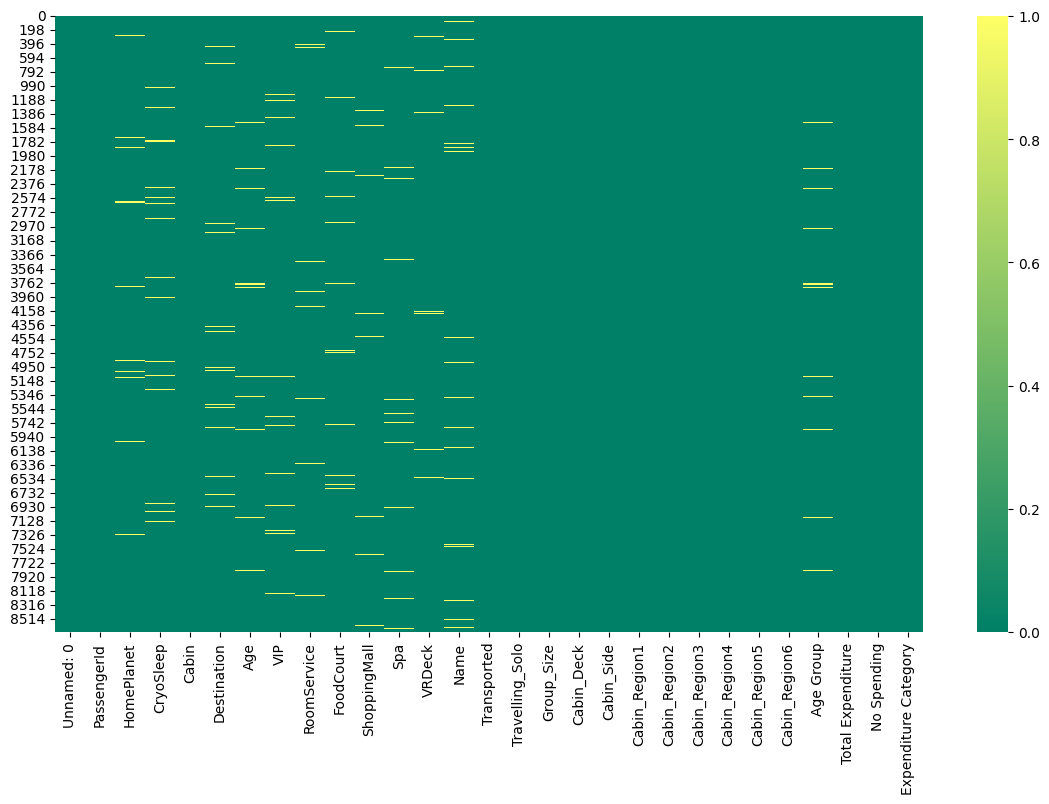

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

In [16]:
# split data into categorical and numerical data 

cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Unnamed: 0', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


In [17]:
# using simple imputer library to fill missing values

imputer1 = SimpleImputer(strategy="most_frequent") # mode used for categorical
imputer2 = SimpleImputer(strategy="median")   # median for numerical

def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

fill_missingno(train_df)
fill_missingno(test_df)

In [18]:
# verify the missing values have been filled s

print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


In [19]:
# check the duplicacy in the data again after filling in missing values

print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [20]:
# check again the cardinality of categorical features

print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

In [21]:
# therefore we want to remove passenger ID, cabin, and Name from our features as high caridinality

pass_df = test_df[["PassengerId"]]

cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)


train_df.drop(columns ='Unnamed: 0', inplace=True)
test_df.drop(columns='Unnamed: 0', inplace=True)

In [22]:
# gathering statistical information on numerical features 

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


##### Dealing with skew 

In [23]:
#calculate the skew 

print('The skew for Total Expenditure is:',skew(train_df['Total Expenditure']))
print('The skew for Room Service is:',skew(train_df['RoomService']))
print('The skew for Food Court is:',skew(train_df['FoodCourt']))
print('The skew for Shopping Mall is:',skew(train_df['ShoppingMall']))
print('The skew for Spa is:',skew(train_df['Spa']))
print('The skew for VR Deck is:',skew(train_df['VRDeck']))

The skew for Total Expenditure is: 4.416825887029282
The skew for Room Service is: 6.396661848251665
The skew for Food Court is: 7.176276632484426
The skew for Shopping Mall is: 12.761639609477124
The skew for Spa is: 7.715118060862281
The skew for VR Deck is: 7.9031903980797065


In [24]:
# transform skewed features to the normal distribution using Log Transformation

cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

In [25]:
#calculate the skew again

print('The skew for Total Expenditure is:',skew(train_df['Total Expenditure']))
print('The skew for Room Service is:',skew(train_df['RoomService']))
print('The skew for Food Court is:',skew(train_df['FoodCourt']))
print('The skew for Shopping Mall is:',skew(train_df['ShoppingMall']))
print('The skew for Spa is:',skew(train_df['Spa']))
print('The skew for VR Deck is:',skew(train_df['VRDeck']))

#we can see the skew measure has decreased but data is still above one- due to large number of zeros

The skew for Total Expenditure is: -0.21239880702649794
The skew for Room Service is: 1.1496680630557234
The skew for Food Court is: 1.1429802289558866
The skew for Shopping Mall is: 1.2382845464635548
The skew for Spa is: 1.1221300902857
The skew for VR Deck is: 1.1932112408166384


C:\Users\44753\AppData\Local\Temp\ipykernel_26560\188071503.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[i],color="green")
C:\Users\44753\AppData\Local\Temp\ipykernel_26560\188071503.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[i],color="green")
C:\Users\44753\App

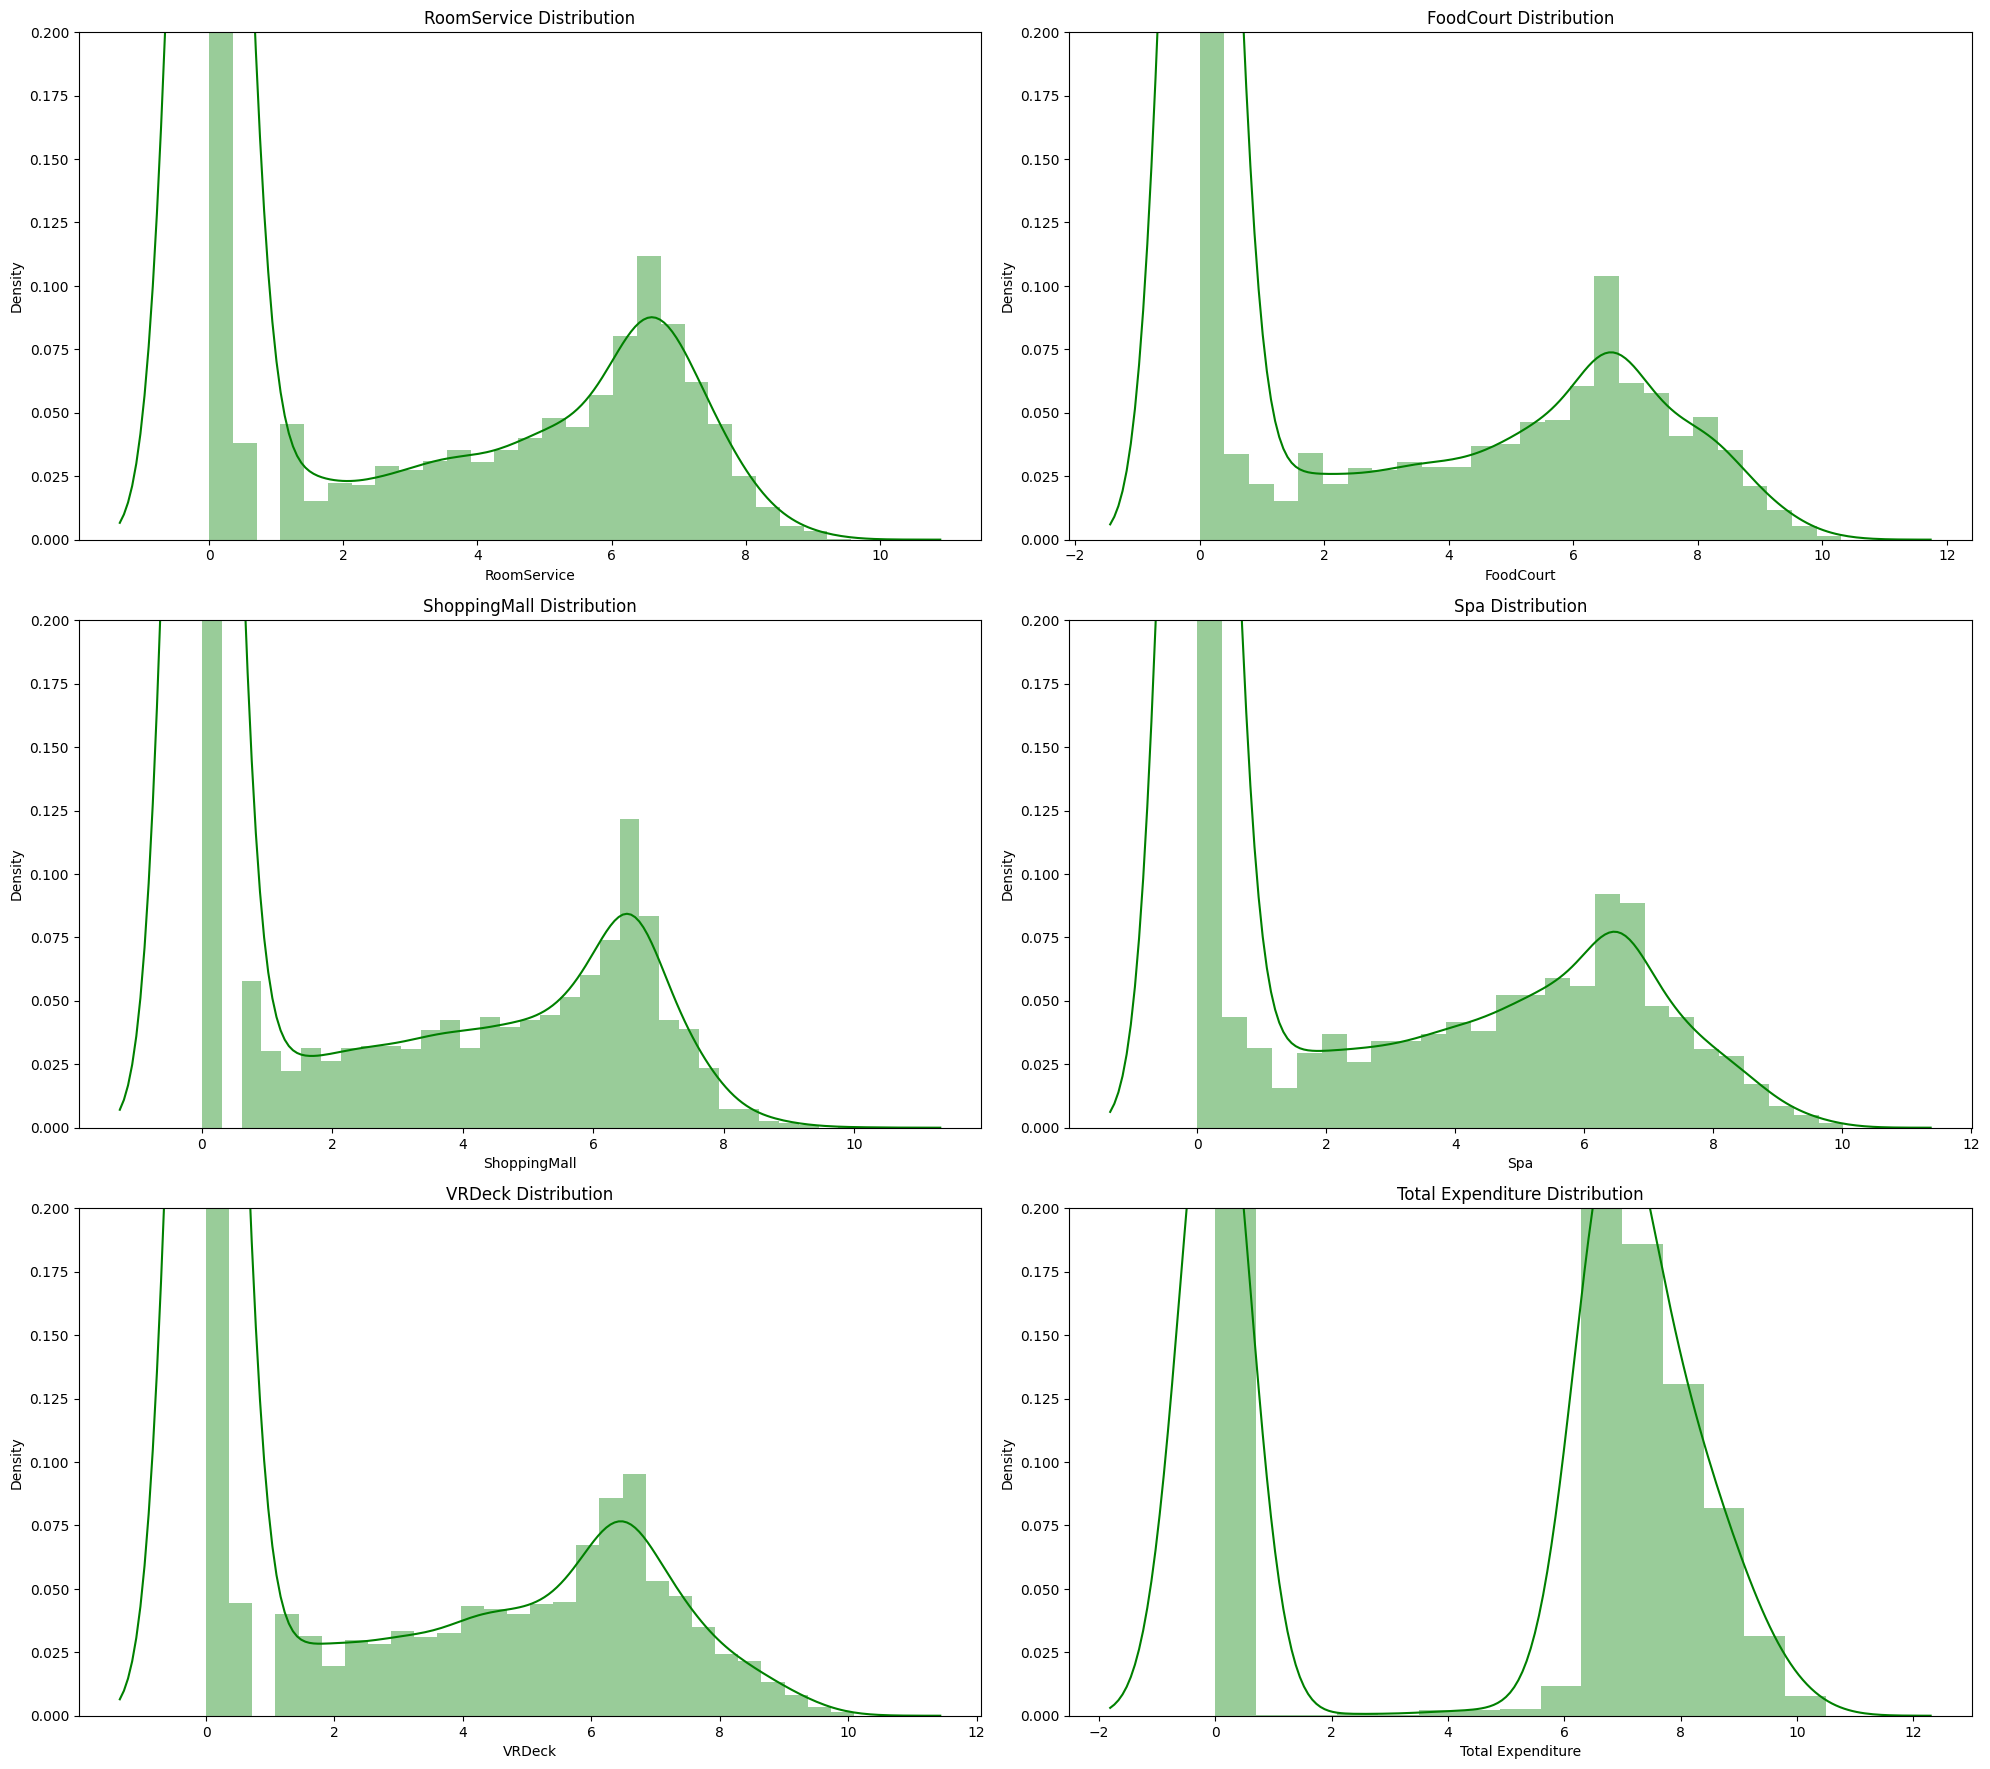

In [38]:
# visualise this skewness

x=1
plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

Feature encoding
- We will do one-hot encoding for nominal categorical variables
- We will do label encoding for ordinal categorical variables 

In [ ]:
# categorise the data into its types 

nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

In [ ]:
# use label encoder on ordinal columns

enc = LabelEncoder()

train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [ ]:
# use one hot encoding for nominal columns

train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

In [30]:
# encode the target feature in the training set 

train_df["Transported"].replace({False:0,True:1},inplace=True)

C:\Users\44753\AppData\Local\Temp\ipykernel_26560\892819055.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Transported"].replace({False:0,True:1},inplace=True)
C:\Users\44753\AppData\Local\Temp\ipykernel_26560\892819055.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Tra

In [31]:
#checking features are encoded

pd.options.display.max_columns = None
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,True,False,False,False,False,True


In [32]:
# selecting features for model training

X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [33]:
#scale data using standard scaler

scaler= StandardScaler()

X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

In [34]:
#splitting data for model which needs scaled data

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(x_train.shape, y_train.shape)

print(x_test.shape,y_test.shape)


(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


In [35]:
#splitting data for model which doesnt need scaled data 

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

print(x_train1.shape, y_train1.shape)

print(x_test1.shape, y_test1.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


In [41]:
# export data to csvs

dfs_to_save = {
    "x_train.csv": pd.DataFrame(x_train),
    "x_test.csv": pd.DataFrame(x_test),
    "y_train.csv": pd.DataFrame(y_train),
    "y_test.csv": pd.DataFrame(y_test),
    "x_train1.csv": pd.DataFrame(x_train1),
    "x_test1.csv": pd.DataFrame(x_test1),
    "y_train1.csv": pd.DataFrame(y_train1),
    "y_test1.csv": pd.DataFrame(y_test1)
}

for filename, df in dfs_to_save.items():
    df.to_csv(f"./data/{filename}", index=False)

print("All CSV files saved to ./data/")

All CSV files saved to ./data/
